# Анализ спроса на авиарейсы в города проведения фестивалей

Компания «F9» — российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## План анализа спроса на авиарейсы    <a class="anchor" id="0-bullet">  

[1.  Откроем файлы с данными и изучим общую информацию](#a)

[2. Проведем анализ данных](#ab)   

- выберем топ-10 городов по количеству рейсов   
- построим графики:   
   - города и количества рейсов   
   - топ-10 городов и количества рейсов    
   - модели самолетов и количества рейсов 

[3. Сформулируем общий вывод](#abc)

### 1. Откроем файлы с данными и изучим общую информацию <a name="a"></a>
👈[назад к оглавлению](#0-bullet)

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Откроем файлы

In [2]:
fa = pd.read_csv('/datasets/query_1.csv')

In [3]:
af = pd.read_csv('/datasets/query_3.csv')

#### Изучим данные таблицы fa *flights amount*

In [4]:
fa

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


#### Описание данных   

- model - модели самолета
- flights_amount - количество рейсов для каждой модели самолетов в сентябре 2018 года

Получим общую информацию о данных таблицы

In [5]:
fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В таблице 2 столбца, в каждом по 8 записей. Пропусков нет.   

In [6]:
fa['model'].describe()

count                  8
unique                 8
top       Boeing 777-300
freq                   1
Name: model, dtype: object

Столбец `model` содержит 8 уникальных записей, дубликатов нет. Тип данных object соответствует требуемому

In [7]:
fa['flights_amount'].describe()

count       8.000000
mean     2035.625000
std      1965.203947
min       300.000000
25%       605.250000
50%       795.000000
75%      4250.250000
max      4557.000000
Name: flights_amount, dtype: float64

Столбец `flights_amount` не содержит нулевых значений. Тип данных integer соответствует требуемому.   
Статистические показатели: минимальное значение 300 рейсов за сентябрь 2018, максимальное значение - 4557, медиана количества полетов 795, среднее значение 2036 рейсов.

#### Изучим данные таблицы af *averige flights*

In [8]:
af.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


#### Описание данных    

- city — город    
- average_flights — среднее количество рейсов, прибывающих в город за день в августе 2018 года

Получим общую информацию о данных таблицы

In [9]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице два столбца, в каждом по 101 записи. Пропусков нет

In [10]:
af['city'].describe()

count      101
unique     101
top       Омск
freq         1
Name: city, dtype: object

Столбец `city` содержит 101 уникальную запись (названия городов). Тип данных object соответствует требуемому

In [11]:
af['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Столбец `average_flights` не содержит нулевых значений. Тип данных float соответствует требуемому.   
Статистические показатели: минимальное значение среднего количества рейсов за день в августе 2018 - 1, максимальное значение - 130, медиана среднего количества рейсов 3, среднее значение - 5,5 рейсов. 

### Вывод   

В данных не обнаружены ошибки или несоответствия. Пропусков нет. Типы данных таблиц **fa** и **af** корректны

### 2. Проведем анализ данных <a name="ab"></a>   
[*назад к оглавлению*](#0-bullet)     🚀

Выберем топ-10 городов по количеству рейсов

In [12]:
af.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Москва и Санкт-Петербург ожидаемо оказались в лидерах по количеству рейсов в августе 2018. Замыкает десятку Ульяновск

Посмотрим на распределение ежедневного количества рейсов по городам

Text(0, 0.5, 'Количество рейсов в день')

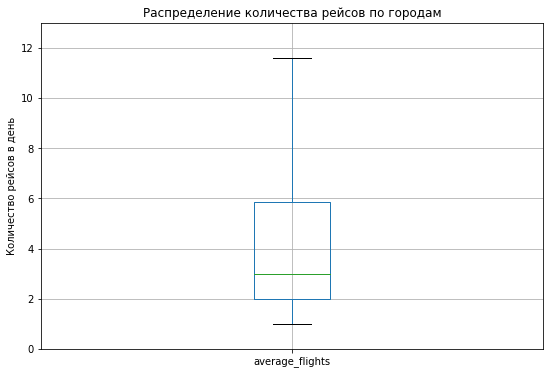

In [13]:
af.boxplot(column='average_flights', figsize=(9,6))
plt.title('Распределение количества рейсов по городам')
plt.ylim(0, 13)
plt.ylabel('Количество рейсов в день')

По диаграмме размаха видно, что в 50% российских городов ежедневно прибывает от 2 до 6 рейсов. Медиана числа рейсов в день - 3 полета. Нормальное распределение ежедневного количества рейсов - от 1 до 12.  Все города, количество рейсов в которых превышает 12 полетов в день, являются выбросами. Это как раз наша тройка лидеров - Москва (130 рейсов), Санкт-Петербург (31 рейс) и Новосибирск (17 рейсов)

Построим график взаимосвязи города и количества рейсов

Text(0.5, 0, 'Город')

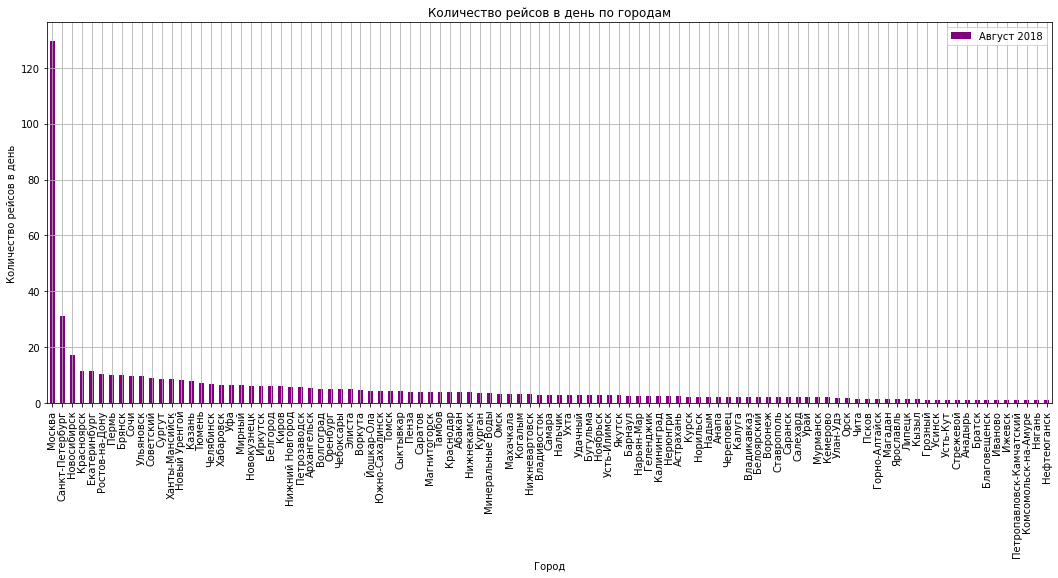

In [14]:
(af.sort_values(by='average_flights', ascending=False)
 .plot(x='city', y='average_flights', kind='bar', title='Количество рейсов в день по городам', color='purple', rot=90, figsize=(18,7), grid=True))
plt.legend(['Август 2018'])
plt.ylabel('Количество рейсов в день')
plt.xlabel('Город')

Лидирует Москва с большим отрывом - 130 рейсов в день против медианного значения 3 рейса ежедневно. Второе место занимает Санкт-Петербург с 31 рейсом в день, замыкает тройку Новосибирск - в среднем 17.3 рейса ежедневно

Построим диаграмму распределения количества рейсов среди  десяти городов, лидеров по авиатрафику

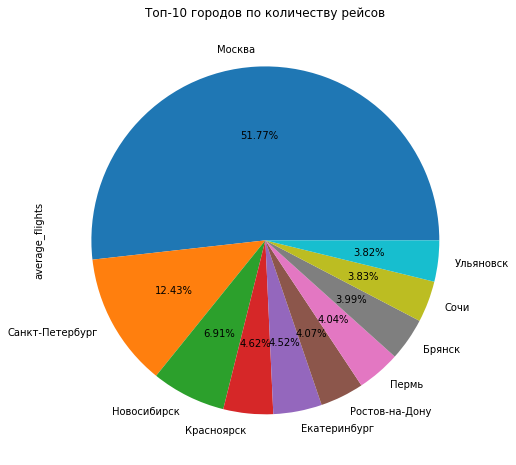

In [15]:
(af.pivot_table(index='city', values='average_flights', aggfunc='sum')
 .sort_values(by='average_flights', ascending=False).head(10)
 .plot(y='average_flights', kind='pie', autopct='%1.2f%%', figsize=(8,8), legend=None, title='Топ-10 городов по количеству рейсов'))

Москва обеспечивает более половины трафика в небе из топ-10 городов - лидеров по воздушным перевозкам. Всего на тройку лидеров Москва, Санкт-Петербург и Новосибирск приходится более 70% полетов 

Построим график взаимосвязи модели самолета и количества рейсов

Text(0.5, 0, 'Модель самолета')

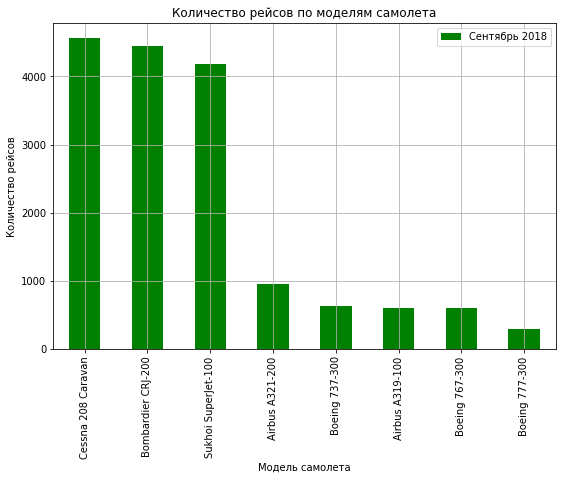

In [16]:
(fa.sort_values(by='flights_amount', ascending=False)
 .plot(x='model', y='flights_amount', title='Количество рейсов по моделям самолета', kind='bar', color='green', figsize=(9,6), grid=True))
plt.legend(['Сентябрь 2018'])
plt.ylabel('Количество рейсов')
plt.xlabel('Модель самолета')

Неожиданно тройку лидеров по числу полетов заняли Cessna, Bombardier и Sukhoi. На каждую модель приходилось не менее 4000 рейсов за сентябрь 2018. Известные модели самолетов Boeing и Airbus оказались аутсайдерами по перевозкам - каждая модель сделала не более 1000 рейсов за месяц

### 3. Вывод <a name="abc"></a>   
[*назад к оглавлению*](#0-bullet)   ⏫

Перед нами стояла цель - обнаружить или опровергнуть рост количества авиаперелетов в города на период проведения в них крупнейших фестивалей. Для понимания предпочтения пользователей, покупающих авиабилеты на те или иные направления, был проведен анализ спроса на авиарейсы.   
Мы располагали данными о количестве выполненных рейсов с разбивкой по моделям самолетов за сентябрь 2018 г. И средним количеством прибывающих рейсов в день по российским городам за август 2018 г.   
В данных не обнаружено ошибок и несоответствий. Типы данных корректные, пропусков и дубликатов нет.   

Был проведен анализ взаимосвязи модели самолета и количества рейсов. ***Тройку лидеров по числу полетов в сентябре 2018 заняли Cessna, Bombardier и Sukhoi***. На каждую модель приходилось не менее 4000 рейсов. ***Известные модели самолетов Boeing и Airbus оказались аутсайдерами по перевозкам*** - каждая модель сделала не более 1000 рейсов за месяц.     

Обнаружена десятка городов с наибольшим количеством рейсов за день в августе 2018 г. ***Москва и Санкт-Петербург ожидаемо оказались в лидерах по количеству рейсов - 130 и 31 рейс в день соответственно***. Медианное значение ежедневного количества рейсов - 3 полета. Половина российских городов ежедневно принимает от 2 до 6 рейсов.  Показатель Москвы превышает медиану на 4300%. И это не связано с проведением в Москве крупнейших фестивалей.    

Половина российских городов ежедневно принимает от 2 до 6 рейсов. Медиана количества рейсов в день по всем российским городам - 3 полета.   

***Москва является транспортным центром России, в том числе и по авиаперевозкам. Большинство пересадочных рейсов проходит именно через Москву. Второе место по объему пересадочных рейсов занимает Санкт-Петербург на западе России, а третье - Новосибирск в Сибири. Как мы видим, именно этот показатель и влияет на количество рейсов в день.    
Влияние проведения фестивалей на рост количества авиаперелетов в городах их проведения не подтвердилось.***     

Для более детального изучения влияния проведения фестивалей или других событий на количество рейсов в городах, нам необходим бОльший объем дополнительных данных. 